<a href="https://colab.research.google.com/github/fabiabocayuva/Linear-Regression-Case---Ecommerce/blob/main/RL_Comercio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto de Machine Learning - Regressão Linear**

# **Case de Empresa de Comércio Eletrônico**

**Desenvolvendo o problema**

* A empresa para qual você trabalha vende roupas online e também fornece serviços de consultoria de estilo e vestuário;

* Clientes procuram na loja sessões/reuniões com um estilista pessoal e podem decidir encomendar roupas que eles desejam usando aplicativo móvel ou site;

* A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site. Não existe recurso para os investimentos e você foi contratado para ajudá-los a descobrir isso. 

**Etapas do projeto**

Esse projeto inclui todas as etapas de uma análise de dados, desde a coleta dos dados até a interpretação dos resultados:

* Coleta de dados 
* Análise de dados
* Criação de modelos 
* Validação de modelos
* Apresentação dos resultados

In [1]:
### Bibliotecas utilizadas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## **1. Coleta de dados**

Base de dados disponibilizada pela empresa no Kaggle: https://www.kaggle.com/srolka/ecommerce-customers

Informações pessoais do cliente:

* **Nome** 
* **Email** 
* **Avatar** 
* **Endereço**

Informações sobre a interação do cliente com a loja:

* **Avg. Session Length**: tempo médio das sessões de consultoria de estilo na loja;
* **Time on App**: tempo médio gasto no app em minutos;
* **Time on Website**: tempo médio gasto no site em minutos;
* **Length of Membership**: há quantos anos o cliente é membro;
* **Yearly Amount Spent**: valor gasto anualmente. 

In [2]:
## Leitura dos dados 
clientes = pd.read_csv('/content/drive/MyDrive/DataSciencedoZero/Case_RegressaoLinear_Comercio/Ecommerce Customers.csv')
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Observamos aqui que a média de tempo gasto pelo cliente no app é de 12 minutos, enquanto que a média de tempo gasta no website é de 37 minutos. 

Agora, vamos conferir o tipo das variáveis dos nossos dados:

In [4]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## **2. Análise Exploratória dos Dados**

In [5]:
!pip install pandas-profiling==2.7.1

In [7]:
import pandas_profiling

relatorio = pandas_profiling.ProfileReport(clientes, title='Relatorio Clientes do Ecommerce')
relatorio.to_file('relatorio_ecommerce.html')

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
relatorio

**Alguns insights retirados do relatório:**

* Pessoas que passam mais tempo no site não necessariamente gastam mais
* Pessoas que gastam mais tempo no app tem uma tendência a gastar mais 
* Pessoas que são clientes a algum tempo não gastam mais 
* Pessoas que tem maior tempo de membro tendem a gastar mais

* Qual a relação da pessoa que passa mais tempo no site em relação ao valor gasto anual?

Não há uma relação linear entre essas variáveis, logo, a resposta é: não necessariamente.

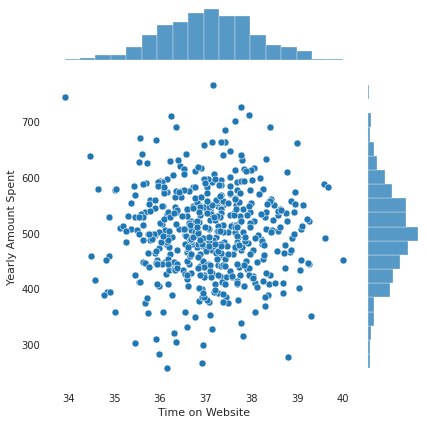

In [10]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes)

* Qual a relação da pessoa que passa mais tempo no app em relação ao valor gasto anual?

Há sim uma relação linear entre essas duas variáveis, porém, não é uma relação forte o suficiente para nos dar a conclusão de que usuários do app gastam mais anualmente. A variação dos dados é muito alta para tal. 

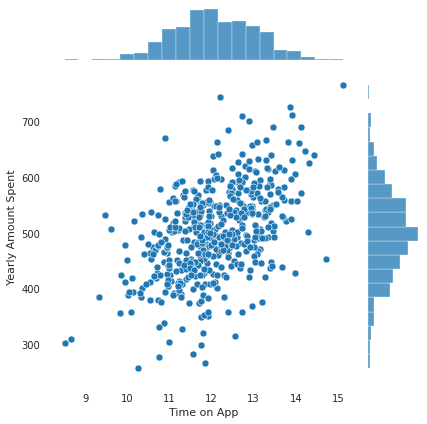

In [11]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

* As pessoas que usam o aplicativo são clientes a mais tempo?

Os dados se concentram mais na região central, provavelmente perto da média. 

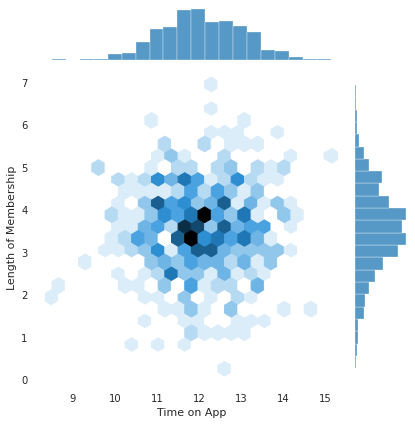

In [12]:
sns.jointplot(x='Time on App', y='Length of Membership', data=clientes, kind='hex')

* Quais variáveis conseguimos explicar ou que tem maior impacto no uquanto uma pessoa gasta no ano?

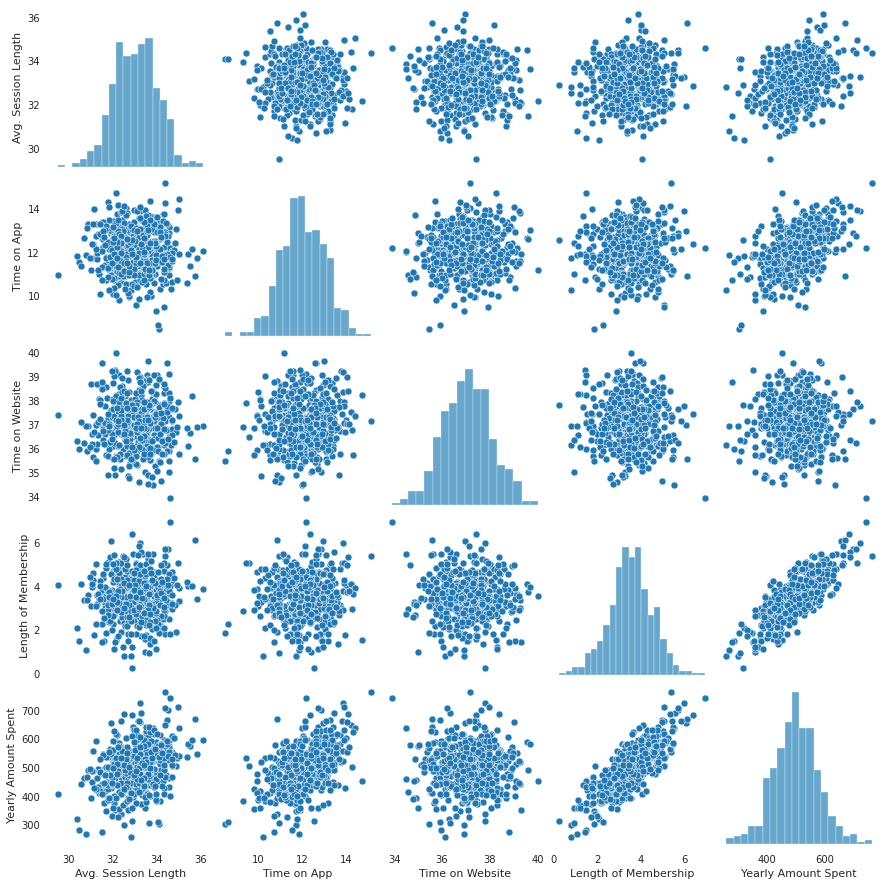

In [13]:
sns.pairplot(clientes)

* Como ficaria um modelo linear usando o Tempo de App em relação ao valor gasto anualmente?

Em outras palavras, como prever o lucro anual da empresa se ela só dependesse dessas duas variaveis.

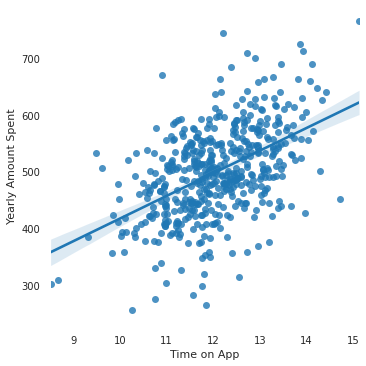

In [14]:
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

* Como ficaria um modelo linear usando o Tempo de Membro em relação ao valor gasto anualmente?

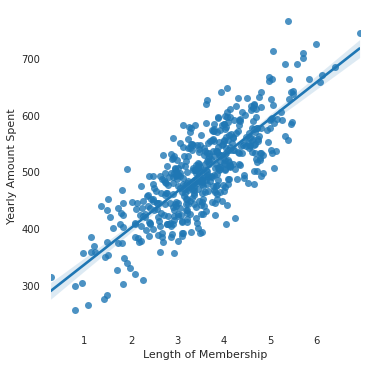

In [15]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=clientes)

## **3. Criação de um Modelo com todas as variáveis**

Separando meu X (inputs) e y (output)

In [31]:
y = clientes['Yearly Amount Spent']
print('Variável de saída\n', y)
X = clientes[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
print('\nVariáveis de entrada\n', X)

Variável de saída
 0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

Variáveis de entrada
      Avg. Session Length  Time on App  Time on Website  Length of Membership
0              34.497268    12.655651        39.577668              4.082621
1              31.926272    11.109461        37.268959              2.664034
2              33.000915    11.330278        37.110597              4.104543
3              34.305557    13.717514        36.721283              3.120179
4              33.330673    12.795189        37.536653              4.446308
..                   ...          ...              ...                   ...
495            33.237660    13.566160        36.417985              3.746573
496            34.702529    11.695736        37.190268              3.576526
497         

Dividindo meu conjunto em treino e teste usando sckit learning

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=39)
print('Dados de entrada de treino:', X_train.shape[0], 'amostras e', X_train.shape[1], 'variáveis')
print('Dados de entrada de teste:', X_test.shape[0], 'amostras e', X_test.shape[1], 'variáveis')
print('Dados de saída de treino:', y_train.shape[0], 'amostras e 1 variável')
print('Dados de saída de teste:', y_test.shape[0], 'amostras e 1 variável')

Dados de entrada de treino: 350 amostras e 4 variáveis
Dados de entrada de teste: 150 amostras e 4 variáveis
Dados de saída de treino: 350 amostras e 1 variável
Dados de saída de teste: 150 amostras e 1 variável


Criando um modelo de regressão linear usando sklearn

In [37]:
from sklearn.linear_model import LinearRegression

# Instanciando o algoritmo
lm = LinearRegression()

# Treinando o modelo 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Apresentando os coeficientes para cada variável do meu X

In [38]:
lm.coef_

array([25.24511638, 38.217726  ,  0.19460254, 61.66756025])

Para validar o modelo no conjunto de teste, utilizamos o método predict()

In [39]:
y_pred = lm.predict(X_test)

Criando um diagrama de dispersão dos valores reais de teste em relação aos valores preditos

Text(0, 0.5, ' y predito')

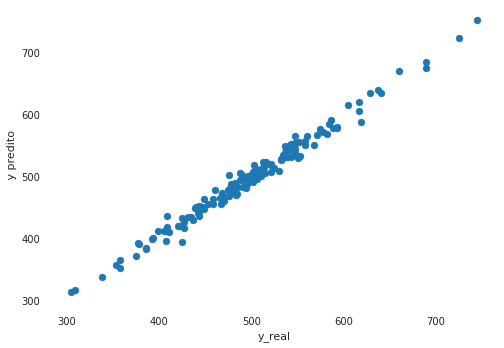

In [42]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_real')
plt.ylabel(' y predito')
# pontos estão bem próximos: o modelo linear preveu bem o comportamento dos dados

## **4. Avaliando o Modelo**

O gráfico relacional dos dados reais com os preditos não é o suficiente para garantir que seu modelo esta de acordo. Além disso, é necessário que as métricas seguintes sejam avaliadas. 

O seguinte gráfico mostra a distribuição normal da variável de saída, que se concentra principalmente no valor de 500k. 

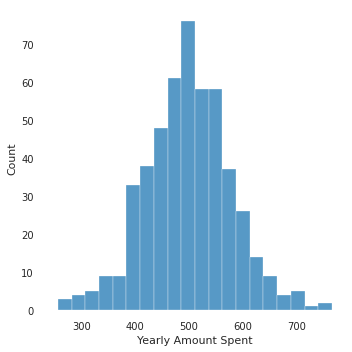

In [43]:
sns.displot(clientes, x='Yearly Amount Spent')
plt.tight_layout()

In [46]:
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R:', metrics.r2_score(y_test, y_pred))

def adjusted_R(y_true, y_pred, P):
  adj_R = 1 - (((1 - metrics.r2_score(y_true, y_pred)) * (len(y_true) - 1)) / (len(y_true) - P - 1))
  return adj_R 
print('R² Ajustado:', adjusted_R(y_test, y_pred, X_train.shape[1]))

MAE: 7.469290185849323
MSE: 91.26106402203975
RMSE: 9.5530656870996
R: 0.9842973571083863
R² Ajustado: 0.9838641807527556


Um erro de MAE de valor 8, contando que a escala de valor dos nossos dados é outra, é um erro desconsiderável. Além disso o valor de R² de 0,98 é muito bom em termos de variância dos dados. 


## **5. Conclusões**

O modelo linear resolveu o problema?

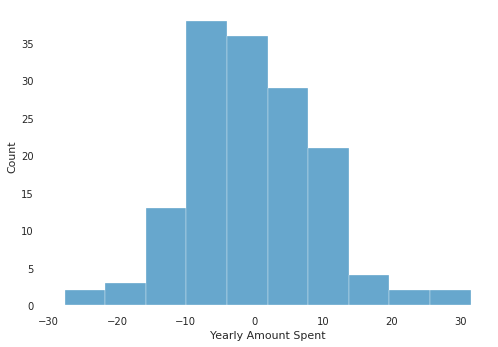

In [51]:
absolute_error = y_test - y_pred
sns.histplot(absolute_error, bins=10)

# Observamos que o erro se mantem na maioria entre -10 e 10, o que é um erro absoluto bem aceitável.

* Qual a variável mais importante do meu modelo?
* É melhor eu investir no site ou no aplicativo?

In [54]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
print('Os pesos de cada variável sobre o meu modelo são os seguintes:')
coef

Os pesos de cada variável sobre o meu modelo são os seguintes:


,Coefs
Avg. Session Length,25.245116
Time on App,38.217726
Time on Website,0.194603
Length of Membership,61.667560


O modelo foi construído com o intuito de aumentar a receita anual da empresa, a variável de saída y 'Yearly Amount Spent', logo, os coeficientes da tabela anterior representam os pesos das variáveis de entrada sobre esse fator. A variável 'Length of Membership' (tempo como membro) demonstrou ter o maior peso, ou sej, a maior influência sobre a receita anual da empresa. 

Concluimos que:

* A cada aumento em uma unidade no tempo médio das sessões de consultoria com estilista, temos um aumento de 25 doláres gasto no ano;
* A cada minuto gasto em média no aplicativo, aumentamos a receita anual em 38 dólares;
* O tempo no site reflete muito pouco na receita anual;
* A empresa ganha mais quando fideliza seu cliente, quanto mais tempo em unidade de fidelização maior a receita anual em 61,66 dólares. 